In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

,TV_Spend,Sales
0,230,22
1,44,10
2,17,9
3,151,18
4,180,20
5,8,5
6,57,11
7,120,15


         TV_Spend     Sales
count   20.000000  20.00000
mean   113.250000  14.85000
std     71.679752   5.18373
min      8.000000   5.00000
25%     59.250000  11.00000
50%    100.000000  14.50000
75%    165.000000  19.25000
max    250.000000  24.00000


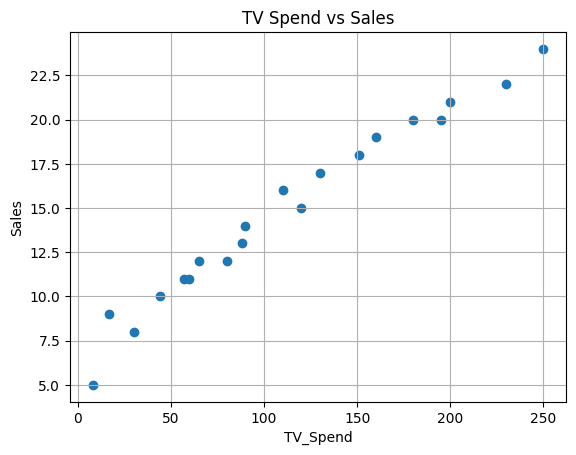

Correlation Coefficient : [[1.         0.98540319]
 [0.98540319 1.        ]] 

slope/Coefficient of TV_Spend =  [0.07246577]
Intercept =  6.694527611375089


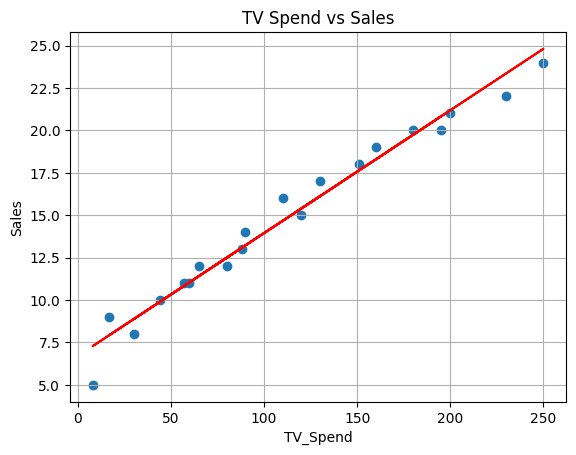

R Squared =  0.9697988827207916
Mean Absolute Error =  0.6838956771458377
Mean Squared Error =  0.7734317378222281
Root Mean Squared Error =  0.8794496789596481
Manually calculated R squared =  0.9697988827207914
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     449.6
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           4.87e-12
Time:                        22:22:33   Log-Likelihood:                -20.648
No. Observations:                  16   AIC:                             45.30
Df Residuals:                      14   BIC:                             46.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                       

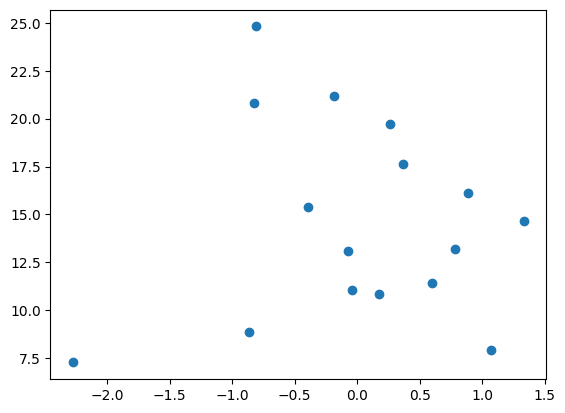

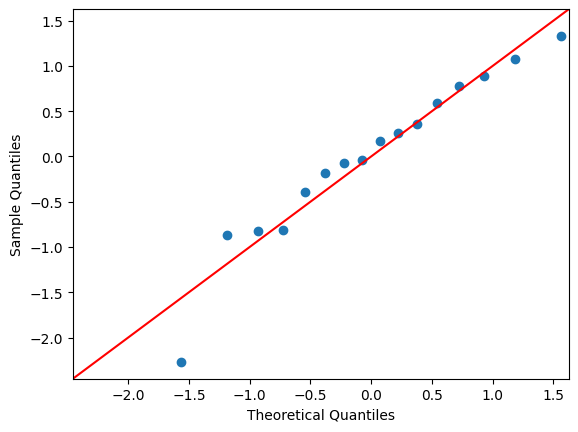

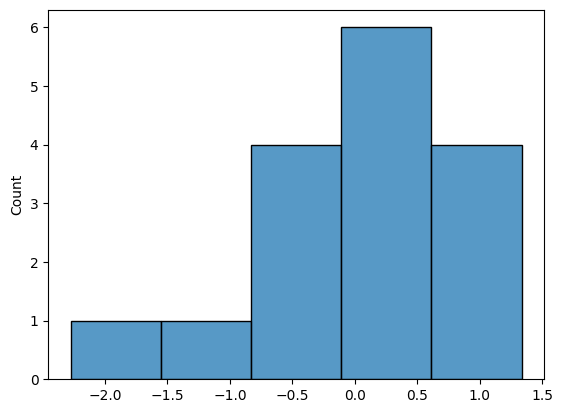

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm





data = {
    'TV_Spend': [230, 44, 17, 151, 180, 8, 57, 120, 200, 88, 130, 65, 250, 90, 30, 160, 110, 80, 195, 60],
    'Sales':    [22, 10, 9, 18, 20, 5, 11, 15, 21, 13, 17, 12, 24, 14, 8, 19, 16, 12, 20, 11]
}
df = pd.DataFrame(data)



# Q1️⃣: Explore the Data
# Display the dataset shape and first few rows
display(df.head(8))

# Describe the data using .describe()
print(df.describe())

# Plot a scatterplot of TV_Spend vs Sales
plt.scatter(df['TV_Spend'],df['Sales'])
plt.xlabel("TV_Spend")
plt.ylabel("Sales")
plt.title("TV Spend vs Sales")
plt.grid()
plt.show()

# Based on the scatterplot, what kind of relationship do you observe? - I can see its a strong positive linear relationshiop, as Spend Increases so does TV_Sales. In mathematical terms it means Spend is directly proportional to TV_Sales.




# Q2️⃣: Correlation
# Calculate the correlation coefficient between TV_Spend and Sales.
print('Correlation Coefficient :', np.corrcoef(x,y), '\n') 

# What does the sign and magnitude tell you? - the R Score is 0.98540319, which means there is an almost Perfect positive linear relationship




# Q3️⃣: Train-Test Split
# Split the data into training (80%) and test (20%) sets.
# Use train_test_split from sklearn
x_train, x_test, y_train, y_test = train_test_split(df[['TV_Spend']], df['Sales'], test_size=0.2, random_state = 42)



# Q4️⃣: Fit the Model
# Fit a Simple Linear Regression model using LinearRegression() from sklearn.
model = LinearRegression()
model.fit(x_train,y_train)

# Print the slope (coefficient) and intercept.
print("slope/Coefficient of TV_Spend = ", model.coef_)
print("Intercept = ", model.intercept_)



# Q5️⃣: Prediction & Visualization
# Predict Sales using your model.
y_predict = model.predict(x_train)

# Plot the regression line over the scatterplot of actual data.
plt.scatter(df['TV_Spend'],df['Sales'])
plt.plot(x_train,y_predict, color = 'red')
plt.xlabel("TV_Spend")
plt.ylabel("Sales")
plt.title("TV Spend vs Sales")
plt.grid()
plt.show()

# How well does the line fit visually? - the line fits well, the model uses Ordinary Least Squares to determine the lowest error slope and itnercept.



# Q6️⃣: Compute Metrics
# Compute R², MAE, MSE, and RMSE.
print("R Squared = ", r2_score(y_train,y_predict))
print("Mean Absolute Error = ", mean_absolute_error(y_train, y_predict))
print("Mean Squared Error = ", mean_squared_error(y_train, y_predict))
print("Root Mean Squared Error = ", root_mean_squared_error(y_train, y_predict))

# Interpret each metric in simple terms — what do they mean in context? 
# - R Squared tells us the model's accuracy, in our case the R Squared value is 0.9697 which is pretty good. in simple terms the Sales are 97.97 percent explained by the TV_Sales variable, but R squared alone is not responsible for detrermining that the model's prediction is good, we also need to look at p value and other factors.
# - Mean Absolute Error gives an average error in each perdiction made by the model, in simple terms we can say for every prediction recorded there could be an error of about 0.6838
# - Mean Squared Error is used to increase the punishment of large devaiations from the regression line. Our MSE is 0.7734
# - Root Mean Squared Error is used to measure the error in prediction in terms of the original units. our RMSE is 0.8794



# Q7️⃣: Compare Manual vs sklearn R²
# Manually compute R² using the formula
x_train_squared       = x_train**2
total_x_train         = float(np.sum(x_train))
total_x_train_squared = float(np.sum(x_train**2))

y_train_squared       = y_train**2
total_y_train         = float(np.sum(y_train))
total_y_train_squared = float(np.sum(y_train**2))

xy_train              = (np.reshape(x_train, (len(x_train,)))) * y_train
total_xy_train        = float(np.sum(xy_train))

manual_r_squared = (( (len(xy_train) * total_xy_train) - (total_x_train * total_y_train) ) / (( ((len(x_train) * total_x_train_squared) - (total_x_train**2))**0.5 ) * ( ((len(y_train) * total_y_train_squared) - (total_y_train**2))**0.5 ))) **2
print("Manually calculated R squared = ", manual_r_squared)
# Verify it matches sklearn’s r2_score. - it matches to the output of sklearn r2_score, very very small difference, output from sklearn - 0.9697988827207916, manually calculated - 0.9697988827207914



# Q8️⃣: OLS Summary
# Use statsmodels.api.OLS() to fit the same regression.
training_df = pd.DataFrame(data = {
    'TV_Sales': (np.reshape(x_train, (len(x_train,)))),
    'Sales'   :    y_train
})

model_smf = smf.ols(formula = 'Sales ~ TV_Sales', data = training_df).fit()
# Print the OLS summary.
print(model_smf.summary())

# Interpret:
# Coefficients - since there is just 1 feature we have just 1 coefficient which is 6.6945
# p-value - p value determines if the feature that is being used to make predictions is due to real effect or just simply coming in by a chance. generally any feature that has a value less than 0.05 is considered acceptable. else, it is recommended to delete it.
# R-squared - r squared value is similar to what i got from sklearn, 0.970. which is pretty good. In simple terms we can say that the TV_Sales can explain 97% of the variations in Sales.
# What does the p-value of the slope tell you? - P Value tells us if the feature is actually useful for prediction of the dependent variable. In our case the p-value is 0.000 which is lower than 0.05 and hence TV_Sales is an acceptable feature. 



# Q9️⃣: Residual Analysis
# Plot residuals vs fitted values.
residuals_smf = model_smf.resid
fitted_values_smf = model_smf.fittedvalues
plt.scatter(residuals_smf,fitted_values_smf)
plt.show()

# What do you observe? - I dont see a patttern here, the scatter plot of fittedvalues and residuals appears to be random
# If residuals form a pattern → what does it indicate? - residuals do not form a defined pattern, this could mean that the model is a proper fit and not and under or an over fit.



# Q🔟: Normality of Residuals
# Plot a histogram or Q-Q plot of residuals.
sm.qqplot(residuals_smf, line = '45');
plt.show()

# Check for normality using:
# shapiro() test, or
# sns.histplot() + visual judgment.
sns.histplot(residuals_smf);


# Are residuals approximately normal? - residuals do look normal, visuall the histogram looks skewed a bit to the left side of the plot.